# PrettyPlot Examples

This notebook demonstrates the various plotting functions available in the PrettyPlot library with multiple examples for each function.

## Setup

In [1]:
import prettyplot as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set publication style globally
pp.set_publication_style()

# For inline display in Jupyter
%matplotlib inline

---

## 1. Bar Plots

The `barplot()` function creates publication-ready bar plots with optional grouping, error bars, and hatch patterns.

### Example 1.1: Simple Bar Plot

In [ ]:
# Create sample data
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D'],
    'value': [23, 45, 38, 52]
})

# Create simple bar plot
fig, ax = pp.barplot(
    data=data,
    x='category',
    y='value',
    title='Simple Bar Plot',
    xlabel='Category',
    ylabel='Value',
    palette='pastel_categorical'
)

plt.show()

### Example 1.2: Bar Plot with Multiple Measurements (Error Bars)

In [ ]:
# Create data with multiple measurements per category
np.random.seed(42)
data_with_error = pd.DataFrame({
    'category': np.repeat(['Control', 'Treatment A', 'Treatment B'], 10),
    'measurement': np.concatenate([
        np.random.normal(100, 15, 10),
        np.random.normal(120, 12, 10),
        np.random.normal(135, 18, 10)
    ])
})

# Create bar plot with error bars (standard error)
fig, ax = pp.barplot(
    data=data_with_error,
    x='category',
    y='measurement',
    title='Bar Plot with Error Bars',
    xlabel='Treatment Group',
    ylabel='Measurement (a.u.)',
    errorbar='se',  # standard error
    capsize=0.1,
    palette='pastel_categorical'
)

plt.show()

### Example 1.3: Grouped Bar Plot with Hue

TypeError: resolve_hatch_mapping() got an unexpected keyword argument 'palette'

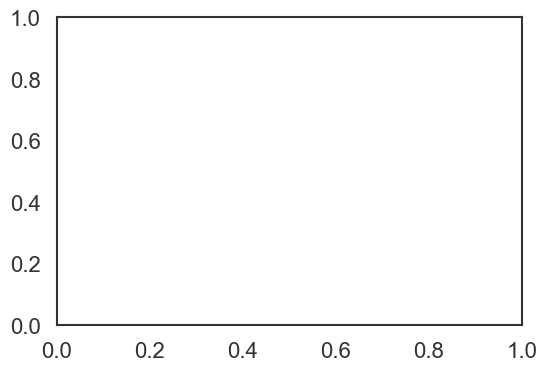

In [2]:
# Create grouped data
np.random.seed(123)
grouped_data = pd.DataFrame({
    'time': np.repeat(['Day 1', 'Day 2', 'Day 3'], 20),
    'group': np.tile(np.repeat(['Control', 'Treated'], 10), 3),
    'response': np.concatenate([
        # Day 1
        np.random.normal(50, 10, 10),  # Control
        np.random.normal(55, 10, 10),  # Treated
        # Day 2
        np.random.normal(52, 10, 10),  # Control
        np.random.normal(70, 12, 10),  # Treated
        # Day 3
        np.random.normal(54, 10, 10),  # Control
        np.random.normal(85, 15, 10),  # Treated
    ])
})

# Create grouped bar plot
fig, ax = pp.barplot(
    data=grouped_data,
    x='time',
    y='response',
    hue='group',
    title='Time Course Experiment',
    xlabel='Time Point',
    ylabel='Response',
    errorbar='se',
    capsize=0.1,
    palette={'Control': '#8E8EC1', 'Treated': '#75B375'}
)

plt.show()

### Example 1.4: Split Bar Plot with Hatch Patterns

In [ ]:
"""
Bar plot functions for prettyplot.

This module provides publication-ready bar plot visualizations with
flexible styling and grouping options.
"""

from typing import Optional, List, Dict, Tuple, Union
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.collections import LineCollection
import seaborn as sns
import pandas as pd
import numpy as np

from prettyplot.config import DEFAULT_LINEWIDTH, DEFAULT_ALPHA, DEFAULT_CAPSIZE, DEFAULT_FIGSIZE
from prettyplot.themes.colors import resolve_palette_mapping, DEFAULT_COLOR
from prettyplot.themes.hatches import resolve_hatch_mapping
from prettyplot.utils import is_categorical

SPLIT_SEPARATOR = "---"

def barplot(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: Optional[str] = None,
    hatch: Optional[str] = None,
    color: Optional[str] = DEFAULT_COLOR,
    ax: Optional[Axes] = None,
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    linewidth: float = DEFAULT_LINEWIDTH,
    capsize: float = DEFAULT_CAPSIZE,
    alpha: float = DEFAULT_ALPHA,
    figsize: Tuple[float, float] = DEFAULT_FIGSIZE,
    palette: Optional[Union[str, Dict, List]] = None,
    hatch_mapping: Optional[Dict[str, str]] = None,
    legend: bool = True,
    errorbar: str = "se",
    gap: float = 0.1,
    hue_order: Optional[List[str]] = None,
    hatch_order: Optional[List[str]] = None,
    **kwargs
) -> Tuple[plt.Figure, Axes]:
    """
    Create a publication-ready bar plot.

    This function creates bar plots with optional grouping, error bars,
    and hatch patterns. Supports both simple and complex bar plots with
    side-by-side grouped bars.

    Parameters
    ----------
    data : DataFrame
        Input data.
    x : str
        Column name for x-axis categories.
    y : str
        Column name for y-axis values.
    hue : str, optional
        Column name for color grouping (typically same as x for hatched bars).
    hatch : str, optional
        Column name for splitting bars side-by-side with hatch patterns.
        When specified, creates grouped bars within each x category.
    color : str, optional
        Fixed color for all bars (only used when hue is None).
        Overrides DEFAULT_COLOR. Example: "#ff0000" or "red".
    ax : Axes, optional
        Matplotlib axes object. If None, creates new figure.
    title : str, default=""
        Plot title.
    xlabel : str, default=""
        X-axis label. If empty and hatch is used, uses x column name.
    ylabel : str, default=""
        Y-axis label. If empty, uses y column name.
    linewidth : float, default=2.0
        Width of bar edges.
    capsize : float, default=0.0
        Width of error bar caps.
    alpha : float, default=0.1
        Transparency of bar fill (0-1). Use 0 for outlined bars only.
    figsize : tuple, default=(4, 4)
        Figure size (width, height) if creating new figure.
    palette : str, dict, or list, optional
        Color palette. Can be:
        - str: seaborn palette name or prettyplot palette name
        - dict: mapping from hue values to colors
        - list: list of colors
    hatch_mapping : dict, optional
        Mapping from hatch values to hatch patterns.
        Example: {"group1": "", "group2": "///", "group3": "\\\\\\"}
    legend : bool, default=True
        Whether to show the legend.
    errorbar : str, default="se"
        Error bar type: "se" (standard error), "sd" (standard deviation),
        "ci" (confidence interval), or None for no error bars.
    gap : float, default=0.1
        Gap between bar groups (0-1).
    hue_order : list, optional
        Hue order. If provided, determines bar order within groups.
    hatch_order : list, optional
        Order of hatch categories. If provided, determines bar order within groups.
    **kwargs
        Additional keyword arguments passed to seaborn.barplot().

    Returns
    -------
    fig : Figure
        Matplotlib figure object.
    ax : Axes
        Matplotlib axes object.

    Examples
    --------
    Simple bar plot:
    >>> fig, ax = pp.barplot(data=df, x="category", y="value")

    Bar plot with color groups:
    >>> fig, ax = pp.barplot(data=df, x="category", y="value",
    ...                       hue="group", palette="pastel_categorical")

    Bar plot with hatched bars and patterns:
    >>> fig, ax = pp.barplot(
    ...     data=df, x="condition", y="measurement",
    ...     hatch="treatment", hue="condition",
    ...     hatch_mapping={"control": "", "treated": "///"},
    ...     palette={"A": "#75b375", "B": "#8e8ec1"}
    ... )

    See Also
    --------
    barplot_enrichment : Specialized bar plot for enrichment analysis
    """
    # Create figure if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()


    # Get hue palette and hatch mappings
    palette = resolve_palette_mapping(
        values=data[hue].unique() if hue is not None else None,
        palette=palette,
    )
    hatch_mapping = resolve_hatch_mapping(
        values=data[hatch].unique() if hatch is not None else None,
        hatch_mapping=hatch_mapping,
    )

    data = _prepare_split_data(
        data, 
        hue, 
        hatch, 
        orderA=hue_order or list(palette.keys()) if hue is not None else None, 
        orderB=hatch_order or list(hatch_mapping.keys()) if hatch is not None else None
    )

    # Determine the strategy for handling hatch and hue
    # Key insight: use hue=hatch for splitting when needed, then override colors
    sns_hue = hue
    sns_palette = palette

    # Fint out categorical axis
    categorical_axis = x if is_categorical(data[x]) else y

    # hatch split only needed if hatch is not the same as the categorical axis
    split_by_hatch = hatch is not None and hatch != categorical_axis
    double_split = split_by_hatch and hue is not None and hue != categorical_axis and hatch != hue
    if split_by_hatch:
        if double_split:
            # Need to create double split by creating a new column with the combined value of hue and hatch
            sns_hue = f"{hue}_{hatch}"
            # Color bars by 
            sns_palette = {
                x: palette[x.split(SPLIT_SEPARATOR)[0]] for x in data[f"{hue}_{hatch}"].cat.categories
            }
        else:
            # Only need to split by hatch
            # We will recolor the bars to color argument if hue is None
            sns_hue = hatch
            sns_palette = None

    # Prepare kwargs for seaborn barplot
    barplot_kwargs = {
        "data": data,
        "x": x,
        "y": y,
        "hue": sns_hue,
        "palette": sns_palette,
        "color": color,
        "fill": False,
        "linewidth": linewidth,
        "capsize": capsize,
        "ax": ax,
        "err_kws": {"linewidth": linewidth},
        "errorbar": errorbar,
        "gap": gap,
        "legend": False,
        "zorder": 10,
    }

    # Merge with user-provided kwargs
    barplot_kwargs.update(kwargs)

    # Create outline bars
    sns.barplot(**barplot_kwargs)

    # Add filled bars with alpha if needed
    if 0 < alpha < 1:
        fill_kwargs = barplot_kwargs.copy()
        fill_kwargs.update({
            "fill": True,
            "alpha": alpha,
            "linewidth": 0,
            "errorbar": None,
            "err_kws": {"linewidth": 0},
        })
        sns.barplot(**fill_kwargs)

    # Apply hatch patterns and override colors if needed
    if hatch is not None:
        _apply_hatches_and_override_colors(
            ax=ax,
            data=data,
            hue=hue,
            hatch=hatch,
            categorical_axis=categorical_axis,
            double_split=double_split,
            linewidth=linewidth,
            color=color,
            palette=palette,
            hatch_mapping=hatch_mapping,
        )

    # Add legend if hue or hatch is used
    # if legend:
    #     _create_barplot_legend(
    #         ax=ax,
    #         data=data,
    #         hue=hue,
    #         hatch=hatch,
    #         palette=palette,
    #         hatch_mapping=hatch_mapping,
    #         alpha=alpha,
    #         linewidth=linewidth
    #     )

    # Set labels
    if xlabel is not None: ax.set_xlabel(xlabel)
    if ylabel is not None: ax.set_ylabel(ylabel)
    if title is not None: ax.set_title(title)

    return fig, ax


# =============================================================================
# Helper Functions
# =============================================================================


def _prepare_split_data(
        data: pd.DataFrame, 
        colA: str,
        colB: str,
        orderA: Optional[List[str]] = None,
        orderB: Optional[List[str]] = None,
    ) -> pd.DataFrame:
    """
    Prepare data for split bar plotting by creating a combined column.
    
    Parameters
    ----------
    data : DataFrame
        Input data
    colA : str
        Column name for first split
    colB : str
        Column name for second split
    orderA : list, optional
        Order of column A values. If provided, data will be sorted to match this order.
    orderB : list, optional
        Order of column B values. If provided, data will be sorted to match this order.
    
    Returns
    -------
    DataFrame
        Data with new combined column for proper bar separation and sorted by the order of the columns
        New column name is f"{colA}_{colB}"
    """
    data = data.copy()
    
    # If order is provided, ensure the split column follows that order
    prepareA = colA is not None and orderA is not None
    prepareB = colB is not None and orderB is not None
    if prepareA:
        data[colA] = pd.Categorical(data[colA], categories=orderA, ordered=True)
        data = data.sort_values([colA])
    if prepareB:
        data[colB] = pd.Categorical(data[colB], categories=orderB, ordered=True)
        data = data.sort_values([colB])

    # Sort the data by the columns in the order of the columns
    columns = ([colA] if prepareA else []) + ([colB] if prepareB else [])
    data.sort_values(columns, inplace=True)
    
    if prepareA and prepareB:
        # Create a combined column that seaborn will use to separate bars
        data[f"{colA}_{colB}"] = data[colA].astype(str) + SPLIT_SEPARATOR + data[colB].astype(str)
        data[f"{colA}_{colB}"] = pd.Categorical(
            data[f"{colA}_{colB}"],
            categories=data[f"{colA}_{colB}"].unique(),
            ordered=True
        )
    return data

def _apply_hatches_and_override_colors(
        ax: Axes,
        data: pd.DataFrame,
        hue: Optional[str],
        hatch: str,
        categorical_axis: str,
        double_split: bool,
        linewidth: float,
        color: Optional[str],
        palette: Optional[Union[str, Dict, List]],
        hatch_mapping: Optional[Dict[str, str]],
    ) -> None:
    """
    Apply hatch patterns using patch.get_label() and idx // n_x, then override colors.

    Uses the approach from user"s example:
    - Track which category each patch belongs to via idx // n_x
    - Use patch.get_label() or hue_order to determine the category
    - Apply hatch based on the hatch column value
    - Override colors if needed
    """
    # Override color if hue is not defined (default to color argument)
    # Or if hue is not the same as hatch
    override_color = hue is None or hue != hatch
    n_axis = len(data[categorical_axis].unique())
    n_hue = len(data[hue].unique()) if hue is not None else 1
    n_hatch = len(data[hatch].unique())  # always defined
    total_bars = n_axis * n_hue * n_hatch
    hue_order = list(palette.keys())
    hatch_order = list(hatch_mapping.keys())
    errorbars = ax.get_lines()

    for idx, patch in enumerate(ax.patches):
        if not hasattr(patch, "get_height"):
            continue

        bar_idx = idx % total_bars
        axis_idx = bar_idx % n_axis
        # Get hatch and hue index in palette and hatch_mapping
        # If hatch is the same as the categorical axis, we need to use the axis_idx
        hatch_idx = (bar_idx // n_axis) % n_hatch if hatch != categorical_axis else axis_idx
        # If double split, we take into account the combined index
        # Otherwise, if matching hatch and hue, we use the hatch index
        # Otherwise, we use the axis index
        hue_idx = (bar_idx // (n_axis * n_hatch)) if double_split else (
            hatch_idx if hue == hatch else axis_idx
        )

        # Determine which layer (outline -> alpha == 1, fill -> alpha < 1)
        alpha = patch.get_alpha()
        outline = alpha is None or (alpha == 1)
        if outline:
            # Apply hatch pattern
            hatch_pattern = hatch_mapping.get(hatch_order[hatch_idx], "")
            patch.set_hatch(hatch_pattern)
            patch.set_hatch_linewidth(linewidth)
        
        # Repaint the bars when needed
        color = palette[hue_order[hue_idx]] if hue is not None else color
        if not (double_split or hatch == categorical_axis):
            # Use the same color for all bars
            patch.set_edgecolor(color)
            if not outline: 
                patch.set_facecolor(color)
                patch.set_alpha(alpha)

            # Match error bar colors to bar colors
            # Only need to color the error bars 
            # for the outline bars (errorbar = None for fill bars)
            if bar_idx < len(errorbars):
                errorbars[bar_idx].set_color(color)

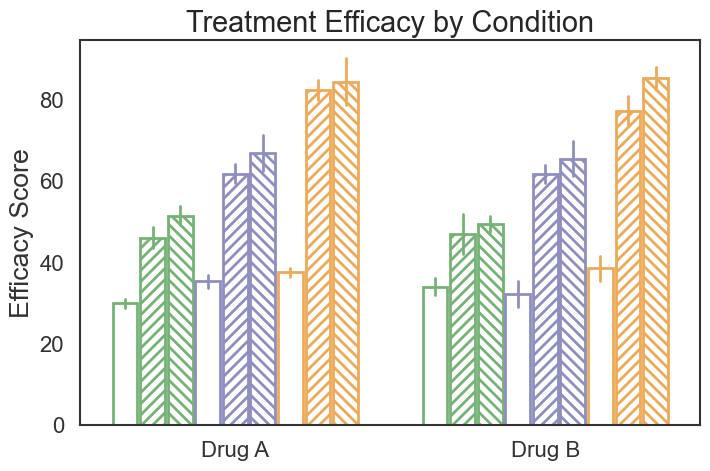

In [7]:
# Create data for split bars
np.random.seed(456)
split_data = pd.DataFrame({
    'condition': np.repeat(['Low', 'Medium', 'High'], 30),
    'sample': np.tile(np.repeat(['Sample 1', 'Sample 2', 'Sample 3'], 10), 3),
    'treatment': np.tile(np.repeat(['Drug A', 'Drug B'], 3), 15),
    'efficacy': np.concatenate([
        # Low
        np.random.normal(30, 5, 10),  # Placebo
        np.random.normal(45, 6, 10),  # Drug A
        np.random.normal(50, 7, 10),  # Drug B
        # Medium
        np.random.normal(35, 5, 10),  # Placebo
        np.random.normal(60, 8, 10),  # Drug A
        np.random.normal(68, 9, 10),  # Drug B
        # High
        np.random.normal(38, 5, 10),  # Placebo
        np.random.normal(75, 10, 10), # Drug A
        np.random.normal(85, 12, 10), # Drug B
    ])
})

# Create split bar plot with hatch patterns
fig, ax = pp.barplot(
    data=split_data,
    x='treatment',
    y='efficacy',
    hue='condition',
    hatch='sample',
    title='Treatment Efficacy by Condition',
    ylabel='Efficacy Score',
    errorbar='se',
    alpha=1,
    # hatch_mapping={'Drug A': '.', 'Drug B': '/'},
    # hatch_mapping={'Low': '', 'Medium': '.', 'High': '/'},
    # palette={'Low': 'red', 'Medium': 'green', 'High': 'blue'},
    # palette={'Drug A': 'red', 'Drug B': 'blue'},
    figsize=(8, 5),
    # hue_order=['Low', 'Medium', 'High']
)

plt.show()

### Example 1.5: Custom Ordering and Alpha

In [ ]:
<cell_type>markdown</cell_type>---

## 2. Scatterplots

The `scatterplot()` function creates flexible scatterplots for both continuous and categorical data with support for size and color encoding. Features distinctive double-layer markers for enhanced visibility.

In [ ]:
<cell_type>markdown</cell_type>---

## 3. Circle Heatmaps

The `circle_heatmap()` function creates scatter-based heatmaps with distinctive double-layer markers, supporting both categorical and continuous color mapping. Use this for advanced categorical scatterplots with extensive legend customization.

<cell_type>markdown</cell_type>### Example 3.1: Basic Circle Heatmap with Categorical Colors

In [ ]:
# Create data with categorical axes
np.random.seed(100)
conditions = ['Control', 'Treatment1', 'Treatment2', 'Treatment3']
cell_types = ['TypeA', 'TypeB', 'TypeC', 'TypeD']

categorical_scatter_data = []
for condition in conditions:
    for cell_type in cell_types:
        categorical_scatter_data.append({
            'condition': condition,
            'cell_type': cell_type,
            'pvalue': np.random.uniform(0.5, 5),
            'log2fc': np.random.uniform(-3, 3)
        })

cat_df = pd.DataFrame(categorical_scatter_data)

# Create scatterplot with categorical x and y
fig, ax = pp.scatterplot(
    data=cat_df,
    x='condition',
    y='cell_type',
    size='pvalue',
    hue='log2fc',
    sizes=(100, 600),
    palette='RdBu_r',  # Diverging colormap for fold change
    hue_norm=(-3, 3),
    title='Differential Expression Analysis (Categorical Axes)',
    xlabel='Condition',
    ylabel='Cell Type',
    alpha=0.2,
    linewidth=2,
    figsize=(8, 6)
)

plt.show()

<cell_type>markdown</cell_type>### Example 3.2: Circle Heatmap with Continuous Color Scale

In [ ]:
# Create scatterplot with both size and continuous hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    size='magnitude',
    hue='score',
    sizes=(50, 500),
    palette='RdYlBu_r',  # Red-Yellow-Blue diverging colormap
    hue_norm=(scatter_data['score'].min(), scatter_data['score'].max()),
    title='Scatterplot with Size and Color Encoding',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.2,
    linewidth=2.5,
    legend=True
)

plt.show()

<cell_type>markdown</cell_type>### Example 3.3: Circle Heatmap with Grid and Custom Styling

In [ ]:
# Add continuous score variable
scatter_data['score'] = scatter_data['x'] * 0.5 + scatter_data['y'] * 0.3 + np.random.randn(n) * 10

# Create scatterplot with continuous hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    hue='score',
    palette='viridis',  # Continuous colormap
    hue_norm=(scatter_data['score'].min(), scatter_data['score'].max()),
    title='Scatterplot with Continuous Hue',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.15,
    linewidth=2,
    legend=True
)

plt.show()

<cell_type>markdown</cell_type>### Example 3.4: Large Circle Heatmap with Custom Ordering

In [ ]:
# Add categorical variable
scatter_data['group'] = pd.cut(scatter_data['y'], bins=3, labels=['Low', 'Medium', 'High'])

# Create scatterplot with categorical hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    hue='group',
    palette='pastel_categorical',
    title='Scatterplot with Categorical Hue',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.15,
    linewidth=2,
    legend=True
)

plt.show()

<cell_type>markdown</cell_type>### Example 3.5: Circle Heatmap with Viridis Palette

In [ ]:
# Add size variable to data
scatter_data['magnitude'] = np.abs(scatter_data['x'] - 50) + np.abs(scatter_data['y'] - 100)

# Create scatterplot with size encoding
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    size='magnitude',
    sizes=(50, 500),  # Min and max marker sizes
    title='Scatterplot with Size Encoding',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.15,
    linewidth=2
)

plt.show()

<cell_type>markdown</cell_type>---

## 4. Venn Diagrams

The `venn_diagram()` function creates 2-way or 3-way Venn diagrams with optional statistical analysis.

In [ ]:
<cell_type>markdown</cell_type>### Example 4.1: Simple 2-Way Venn Diagram

### Example 2.2: Scatterplot with Custom Color

In [ ]:
<cell_type>markdown</cell_type>### Example 4.2: 2-Way Venn with Statistical Testing

### Example 2.1: Simple Scatterplot with Continuous Data

<cell_type>markdown</cell_type>### Example 4.3: Simple 3-Way Venn Diagram

### Example 2.1: Basic Circle Heatmap with Categorical Colors

In [ ]:
<cell_type>markdown</cell_type>### Example 4.4: 3-Way Venn with Statistical Testing

### Example 2.2: Circle Heatmap with Continuous Color Scale

In [ ]:
<cell_type>markdown</cell_type>### Example 4.5: Weighted vs Unweighted Venn Diagrams

### Example 2.3: Circle Heatmap with Grid and Custom Styling

In [ ]:
<cell_type>markdown</cell_type>---

## Summary

This notebook demonstrated:

### Bar Plots
- Simple bar plots with single categories
- Bar plots with error bars (standard error/deviation)
- Grouped bar plots with hue parameter
- Split bar plots with hatch patterns
- Custom ordering and transparency settings
- Custom color parameter for single-color plots

### Scatterplots
- Simple scatterplots with continuous data
- Custom color specification
- Size encoding for additional data dimension
- Categorical hue for group comparison
- Continuous hue with colormaps
- Combined size and continuous hue encoding
- Categorical axes (circle heatmap style)
- Single vs double marker styles

### Circle Heatmaps
- Basic categorical color mapping
- Continuous color scales with colorbars
- Grid styling and customization
- Custom ordering and large datasets
- Various color palettes (RdBu_r, coolwarm, viridis)
- Advanced legend customization

### Venn Diagrams
- 2-way and 3-way Venn diagrams
- Statistical significance testing
- Weighted vs unweighted layouts
- Custom colors and transparency
- Using dictionaries for labeled sets

For more information, see the [PrettyPlot documentation](https://github.com/jorgebotas/prettyplot).

### Example 2.4: Large Circle Heatmap with Custom Ordering

In [ ]:
# Create larger dataset
tissues = ['Brain', 'Liver', 'Heart', 'Kidney', 'Lung', 'Muscle']
treatments = ['T0', 'T1', 'T2', 'T3', 'T4']

np.random.seed(200)
large_data = []
for tissue in tissues:
    for treatment in treatments:
        large_data.append({
            'tissue': tissue,
            'treatment': treatment,
            'expression': np.random.uniform(1, 10),
            'tissue_type': 'Neural' if tissue == 'Brain' else 
                          'Organ' if tissue in ['Liver', 'Heart', 'Kidney', 'Lung'] else 'Muscle'
        })

large_df = pd.DataFrame(large_data)

# Create large circle heatmap with custom ordering
ax, cbar = pp.circle_heatmap(
    data=large_df,
    x='treatment',
    y='tissue',
    size='expression',
    hue='tissue_type',
    y_order=['Brain', 'Heart', 'Lung', 'Liver', 'Kidney', 'Muscle'],  # Custom order
    title='Tissue-Specific Expression',
    xlabel='Time Point',
    ylabel='Tissue',
    size_legend_title='Expression',
    palette={'Neural': '#FF6B6B', 'Organ': '#4ECDC4', 'Muscle': '#FFE66D'},
    sizes=(50, 800),
    alpha=0.25,
    figsize=(8, 8)
)

plt.show()

### Example 2.5: Circle Heatmap with Viridis Palette

In [ ]:
# Create intensity data
np.random.seed(300)
proteins = [f'Protein{i}' for i in range(1, 7)]
timepoints = ['0h', '2h', '4h', '8h', '12h', '24h']

intensity_data = []
for protein in proteins:
    for time in timepoints:
        intensity_data.append({
            'protein': protein,
            'time': time,
            'intensity': np.random.uniform(5, 15),
            'fold_change': np.random.uniform(0, 10)
        })

intensity_df = pd.DataFrame(intensity_data)

# Create circle heatmap with viridis
ax, cbar = pp.circle_heatmap(
    data=intensity_df,
    x='time',
    y='protein',
    size='fold_change',
    hue='intensity',
    hue_norm=(5, 15),
    palette='viridis',
    title='Protein Dynamics Over Time',
    xlabel='Time',
    ylabel='Protein',
    size_legend_title='Fold Change',
    hue_legend_title='Intensity',
    alpha=0.2,
    linewidth=2,
    figsize=(10, 7),
    cbar_kws={'shrink': 0.5, 'aspect': 10}
)

plt.show()

---

## 3. Venn Diagrams

The `venn_diagram()` function creates 2-way or 3-way Venn diagrams with optional statistical analysis.

### Example 3.1: Simple 2-Way Venn Diagram

In [ ]:
# Create two sample sets
set1 = set(range(1, 51))  # 1-50
set2 = set(range(30, 81)) # 30-80

# Create 2-way Venn diagram
fig, ax, stats = pp.venn_diagram(
    sets=[set1, set2],
    labels=['Group A', 'Group B'],
    colors=pp.get_palette('pastel_categorical', n_colors=2),
    alpha=0.4
)

print("\nOverlap Statistics:")
print(f"Set sizes: {stats['set_sizes']}")
print(f"Overlap: {stats['overlap']}")

plt.show()

### Example 3.2: 2-Way Venn with Statistical Testing

In [ ]:
# Create sets with significant overlap
genes_disease = set([f'GENE{i}' for i in range(1, 101)])  # 100 disease genes
genes_pathway = set([f'GENE{i}' for i in range(50, 151)])  # 100 pathway genes

# Create Venn diagram with statistical testing
fig, ax, stats = pp.venn_diagram(
    sets={'Disease Genes': genes_disease, 'Pathway Genes': genes_pathway},
    universe_size=20000,  # Total number of genes in genome
    colors=['#FFB3BA', '#BAE1FF'],
    alpha=0.5,
    figsize=(10, 7)
)

print("\nStatistical Analysis:")
print(f"Overlap: {stats['overlap']}")
print(f"Expected overlap: {stats['expected_overlap']:.2f}")
print(f"Fold enrichment: {stats['fold_enrichment']:.2f}x")
print(f"P-value: {stats['p_value']:.2e}")
print(f"Significant: {stats['significant']}")

plt.show()

### Example 3.3: Simple 3-Way Venn Diagram

In [ ]:
# Create three sample sets
setA = set(range(1, 61))   # 1-60
setB = set(range(40, 101)) # 40-100
setC = set(range(70, 131)) # 70-130

# Create 3-way Venn diagram
fig, ax, stats = pp.venn_diagram(
    sets=[setA, setB, setC],
    labels=['Set A', 'Set B', 'Set C'],
    colors=pp.get_palette('pastel_categorical', n_colors=3),
    alpha=0.35,
    figsize=(11, 7)
)

print("\n3-Way Overlap Statistics:")
print(f"Set sizes: {stats['set_sizes']}")
print(f"Triple overlap: {stats['triple_overlap']}")
print(f"Unique counts: {stats['unique_counts']}")
print(f"Pairwise overlaps: {stats['pairwise_overlaps']}")

plt.show()

### Example 3.4: 3-Way Venn with Statistical Testing

In [ ]:
# Create biological example: transcription factor binding sites
tf1_targets = set([f'GENE{i}' for i in range(1, 201)])    # 200 genes
tf2_targets = set([f'GENE{i}' for i in range(100, 301)])  # 200 genes
tf3_targets = set([f'GENE{i}' for i in range(150, 351)])  # 200 genes

# Create 3-way Venn with statistics
fig, ax, stats = pp.venn_diagram(
    sets={'TF1': tf1_targets, 'TF2': tf2_targets, 'TF3': tf3_targets},
    universe_size=20000,
    colors=['#FFAAA5', '#FFD3B6', '#A8E6CF'],
    alpha=0.4,
    figsize=(12, 8)
)

print("\nTranscription Factor Overlap Analysis:")
print(f"Triple overlap: {stats['triple_overlap']}")
print(f"Expected triple overlap: {stats['expected_triple_overlap']:.2f}")
print(f"Fold enrichment: {stats['fold_enrichment']:.2f}x")
print(f"P-value: {stats['p_value']:.2e}")

plt.show()

### Example 3.5: Weighted vs Unweighted Venn Diagrams

In [ ]:
# Create sets with very different sizes
small_set = set(range(1, 21))      # 20 elements
medium_set = set(range(15, 66))    # 50 elements
large_set = set(range(50, 201))    # 150 elements

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Unweighted (equal areas)
fig, ax1, stats1 = pp.venn_diagram(
    sets=[small_set, medium_set, large_set],
    labels=['Small (20)', 'Medium (50)', 'Large (150)'],
    weighted=False,
    colors=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    alpha=0.35,
    ax=ax1
)
ax1.set_title('Unweighted (Equal Areas)', fontsize=14, fontweight='bold')

# Weighted (proportional to set sizes)
fig, ax2, stats2 = pp.venn_diagram(
    sets=[small_set, medium_set, large_set],
    labels=['Small (20)', 'Medium (50)', 'Large (150)'],
    weighted=True,
    colors=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    alpha=0.35,
    ax=ax2
)
ax2.set_title('Weighted (Proportional Areas)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nNote: Unweighted layouts show all regions with equal area,")
print("while weighted layouts scale regions proportional to set sizes.")

---

## Summary

This notebook demonstrated:

### Bar Plots
- Simple bar plots with single categories
- Bar plots with error bars (standard error/deviation)
- Grouped bar plots with hue parameter
- Split bar plots with hatch patterns
- Custom ordering and transparency settings

### Circle Heatmaps
- Basic categorical color mapping
- Continuous color scales with colorbars
- Grid styling and customization
- Custom ordering and large datasets
- Various color palettes (RdBu_r, coolwarm, viridis)

### Venn Diagrams
- 2-way and 3-way Venn diagrams
- Statistical significance testing
- Weighted vs unweighted layouts
- Custom colors and transparency
- Using dictionaries for labeled sets

For more information, see the [PrettyPlot documentation](https://github.com/jorgebotas/prettyplot).